# Wine quality analysis and prediction

Your task is to analyze the Wine quality dataset using techniques learned in the course and create a perceptron model to predict wine quality based on existing variables.

The notebook consists of two parts:

  1. Analyzing the data (summary statistics and graphical analysis)
  2. Creating a perceptron model.

### Data Description

The data we are using is modified [Wine Quality - Red Wine](https://archive.ics.uci.edu/ml/datasets/wine+quality) datasets taken from the UCI repository.

#### Red Wine Data

Information regarding data:
&emsp;&emsp;&emsp;&emsp;**Title:** Wine Quality<br>
&emsp;&emsp;&emsp;&emsp;**Number of Instances:** 1599<br>
&emsp;&emsp;&emsp;&emsp;**Number of Attributes:** 6<br>
&emsp;&emsp;&emsp;&emsp;**Attribute Information:**

    1. fixed acidity:           continuous
    2. volatile acidity:        continuous
    3. residual sugar:          continuous
    4. density:                 continuous
    5. alcohol:                 continuous
    6. quality:                 multi-valued discrete

### Variable Descriptions

Here is an explanation of each variable in the datasets:

1. **fixed acidity**: Refers to the non-volatile acids in wine such as tartaric acid. It contributes to the wine's tartness.
2. **volatile acidity**: Measures the amount of acetic acid in wine, which at high levels can lead to an unpleasant vinegar taste.
3. **residual sugar**: The amount of sugar remaining after fermentation stops. It is measured in grams per liter and affects the sweetness of wine.
4. **density**: The density of wine, close to the density of water. It can be influenced by the presence of sugars, alcohol, and other compounds.
5. **alcohol**: The alcohol content of the wine, usually measured as a percentage of volume.
6. **quality**: A score between 0 and 10 given by wine experts based on sensory data, representing the overall quality of the wine. Based on these scores, `bad wine` is assigned to wines with a score < 7 and `good wine` to wines with a score ≥ 7.


### Tasks

1. Load CSV data into a pandas DataFrame.
2. Explore data:
   * Specify which variables are numerical and which are categorical variables.
   * Calculate the number of unique values for each variable.
   * Detect missing values (`NaN` values).
   * Detect duplicated rows.
3. If there are any `NaN` values, filter them out.
4. If there are any duplicated rows, filter them out.


### Hints

1. A useful method for the description of data types is `.info()`.


In [1]:
# import all necessary libraries
import itertools
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from imblearn.over_sampling import SMOTE
from sklearn.linear_model import Perceptron
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import recall_score

We will first import the data into a pandas dataframe and inspect it's properties.

In [ ]:
# Load the dataset from the
df = pd.read_csv('https://gist.githubusercontent.com/Ruzejjur/a6a086d0160172a14d72c67ac9490a3c/raw/f2d9848162b5491abbf35c5e3d448a41e87edf7b/wine_quality.csv')

# Display the first few rows of the dataset
df.head()

# Analysis of variables

Analyze the categorical and numerical variables separately.

## Analysis of categorical variables


### Tasks

1. Subset the dataset only for the categorical variables.
2. Explore unique values of these variables.
3. Calculate summary statistics for those categorical variables which are numeric:
   * min
   * max
   * mean
   * median
   * variance
   * standard deviation
4. Create graphical analysis of the categorical variables:
   * Create a count plot for each categorical variable (use `sns.countplot()`).
5. Describe the insights from the analysis:
   * Is the dataset balanced with respect to individual categories?


### Hints

1. A useful method for the summary statistics is `.describe()` from the pandas package.
2. We would like the data to be evenly represented across categories (i.e., uniformly distributed). Are the data uniformly distributed across the categories?


## Analysis on Numerical Attributes

### Tasks

1. Subset the dataset only for the numerical variables.
2. Calculate summary statistics for these variables:
   * min
   * max
   * mean
   * median
   * variance
   * standard deviation
3. Create graphical analysis of the numeric variables:
   * Create one (or more) of the following plots for each numeric variable:
      * Histogram (`sns.histplot()`)
      * Box plot (`sns.boxplot()`)
      * Violin plot (`sns.violinplot()`)
4. Analyze the relationships between individual numerical variables:
   * Use `sns.pairplot()`.
5. Describe the insights from the analysis:
   * Describe the distribution of individual numeric variables.
   * Are there any relationships between the numeric variables?
     * For example: If the alcohol increases, does the fixed acidity increase/decrease?


### Hints

1. A useful method for the summary statistics is `.describe()` from the pandas package.


## Analysis of categorical vs. numerical variables

### Tasks

1. Work with the original dataset (containing both categorical and numeric variables).
2. Explore the relationship between categorical variables and numeric variables:
   * Create box plots of categorical vs. numerical variables for each variable (use `sns.boxenplot()`).
3. (Optional) Create a violin plot of categorical vs. numerical variables for each variable (use `sns.violinplot()`).
4. Create a line plot of `quality` vs. individual numerical variables.
5. Describe what you found from the plots in tasks 2, 3, and 4.


# Prediction model

In this section, you are going to train the perceptron model.

The dataset is going to be split into two parts:
1. **Train dataset** - This is the dataset on which the model is going to be trained.
2. **Test dataset** - This is the set of data which the model 'has not seen yet' and it is used to test how well the model predicts wine `quality` with new data.

The splitting is done randomly assigning data to Train and Test datasets. The split is as follows:
1. 80% is assigned to the Train dataset.
2. 20% is assigned to the Test dataset.

On each iteration, Accuracy Score is calculated.

**Accuracy Score** is defined as the ratio of the number of correct predictions to the total number of predictions made.

Mathematically, it is given by:

$$
\text{Accuracy} = \frac{\text{Number of Correct Predictions}}{\text{Total Number of Predictions}}
$$

So if the accuracy is 1, this means that the model predicts the values exactly. In reality, accuracy = 1 is not achievable, so our goal is to have accuracy as high as possible.

## Dependent variable imbalance

We also need to handle the imbalanced dependent variable `quality` using the **Synthetic Minority Over-sampling Technique** (SMOTE).

Imbalanced datasets occur when the number of instances in one class significantly outnumbers the instances in another class. This imbalance can lead to biased models that perform poorly on the smaller class. To address this issue, we use SMOTE to oversample (generate synthetic observations) the smaller class.

**SMOTE** works by generating synthetic examples for the smaller class. It does this by selecting an instance from the smaller class and finding its k-nearest neighbors (5 closest observations). New synthetic example is then created which is similar to it's neighbors.


### Tasks

Create a perceptron based on the variables in the dataset for prediction of `quality` based on all other variables.

1. Separate the dependent and independent variables:
   * Name the independent variables dataframe `X`.
   * Name the dependent variable `y`.
2. Convert any categorical variable to `int`.
3. In the analysis of the categorical variable, we found out that the `quality` variable is highly imbalanced. Use the following code to alleviate the issue:
```python
from imblearn.over_sampling import SMOTE
# Initialize SMOTE with 5 nearest neighbors
oversample = SMOTE(k_neighbors=5)
# Fit and resample the dataset
X_ros, y_ros = oversample.fit_resample(X, y)


  4. Create a Train-Test split of the data with the Test dataset being 20% of the data.

  ```python
  from sklearn.model_selection import train_test_split

  # Create Train-Test split
  X_train, X_test, y_train, y_test = train_test_split(X_ros, y_ros, test_size=0.2, random_state=seed)


5. Preprocess the independent variables dataset (both Train and Test).

6. Fit the perceptron model to the Train data and evaluate the accuracy on the Test data.
  * Initialize it with learning rate saved to `learning_rate` variable and the number of epochs into `epoch_num`.


### Hints

1. Convert `bad wine` to 0 and `good wine` to 1.
2. You can use `StandardScaler()` for data preprocessing.
3. For accuracy testing, you can use `accuracy_score(y_test, y_pred)`.


## Testing model accuracy

## DO NOT MODIFY THIS CODE!!!

Just uncomment the code and run it after you are finished with the previous sections.


In this section, the model you trained above is going to be evaluated using repeated random Train-Test dataset splitting.

The splitting is done 1000 times, randomly assigning data to Train and Test datasets. The split is as follows:
1. 80% is assigned to the Train dataset.
2. 20% is assigned to the Test dataset.

On each iteration, Accuracy Score is calculated.



### Tasks

Run the code below and describe the results.

How good is our model for the prediction of `quality` based on other variables?
i.e. How accurate is your model in predicting the `quality`?


### Hints

It is crucial to name the independent variables dataset as `X_ros` and the dependent variable as `y_ros` after aplication of SMOTE  and learning rate into `learning_rate` and number of epochs into`epoch_num`f or the code below to function.


Min. Accuracy Score: 0.8085106382978723
Max. Accuracy Score: 0.9106382978723404
Mean Accuracy Score: 0.8597404255319149
Median Accuracy Score: 0.8595744680851064


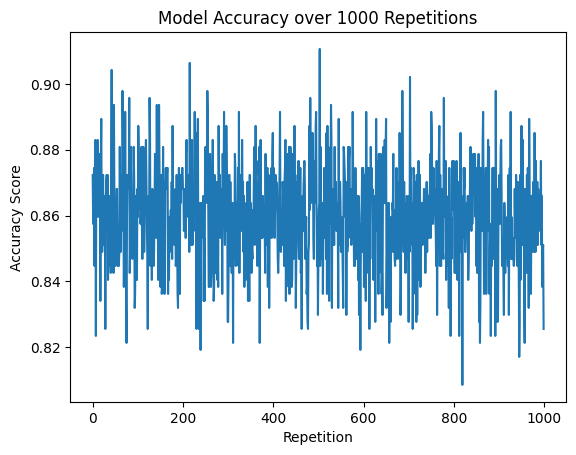

In [ ]:
import numpy as np
import pandas as pd
import statistics
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Store accuracy scores
accuracy_scores = []

# Repeated train-test split
for repetition in range(num_repetitions):
    # Split the dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X_ros, y_ros, test_size=0.2, random_state=seed + repetition)

    # Create a perceptron classifier
    clf = Perceptron(eta0=learning_rate, max_iter=epoch_num, random_state=seed)  # eta0 is learning rate
    # Train the perceptron classifier
    clf.fit(X_train, y_train)

    # Predict on the test data
    y_pred = clf.predict(X_test)

    # Calculate accuracy score on the testing set
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores.append(accuracy)

# Print the results
print("Min. Accuracy Score:", min(accuracy_scores))
print("Max. Accuracy Score:", max(accuracy_scores))
print("Mean Accuracy Score:", statistics.mean(accuracy_scores))
print("Median Accuracy Score:", statistics.median(accuracy_scores))

# Plot the accuracy scores
plt.plot(range(num_repetitions), accuracy_scores)
plt.xlabel('Repetition')
plt.ylabel('Accuracy Score')
plt.title('Model Accuracy over 1000 Repetitions')
plt.show()
